### Lab 1 Python Fundamentals

#### Task:
- Count and plot DNA sequences

##### i took help from ChatGPT to help me with the syntax and to support my thinking and how to structure the sequence of the code (in what order to do things)

In [15]:
# open up the 'dna_raw.txt' -data file
# 1. 
def read_dna_file(file_path = 'dna_raw.txt'):
    with open(file_path, 'r') as file:
        lines = file.readlines()

# make a dictionary of the dna sequences
# clean the data, make it all lower case and remove '>'

    sequences = {}
    sequence_id = None
    sequence = ''

    for line in lines:
        line = line.strip()
        if line.startswith('>'):
            if sequence_id:
                sequences[sequence_id] = sequence
            sequence_id = line[1:]
            sequence = ''
        else:
            sequence += line.lower()
    if sequence_id:
        sequences[sequence_id] = sequence
        
        return sequences

In [3]:
#2.
from collections import Counter

#creating a function that counts the number of A, T, C, G in the sequences

def count_dna_letters(sequences):
    dna_counts = {}
    for sequence_id, sequence in sequences.items():
        counts = {'A' : 0, 'T' : 0, 'C' : 0, 'G' : 0}

        # Loop counting only occurrences of A, T, C, G
        for letter in sequence:
            if letter in counts:
                counts[letter] += 1
        # Store the counts
        dna_counts[sequence_id] = counts
        sequence = sequence.upper()
    return dna_counts


In [33]:
# 3. plot in coloured bar chart the counts of the sequences for each letter in DNA

import matplotlib.pyplot as plt

def plot_dna_counts(dna_counts):
    for sequence_id, counts in dna_counts.items():
        letters = list(counts.keys())
        frequencies = list(counts.values())

        plt.figure()
        plt.bar(letters, frequencies, color = ['red', 'green', 'blue', 'yellow'])
        plt.title(f"Frequency of DNA letters in {sequence_id}")
        plt.xlabel('DNA letter')
        plt.ylabel('Frequency')
        plt.show()

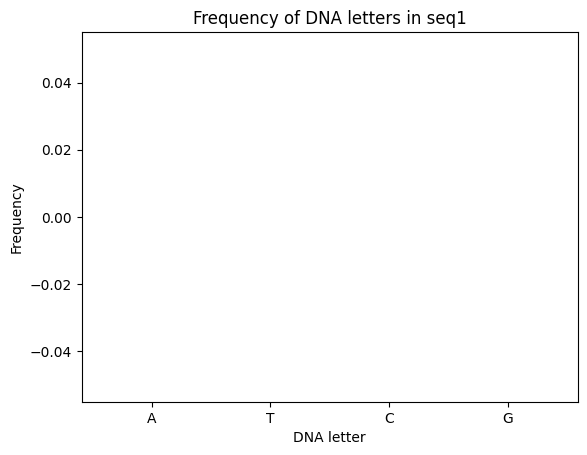

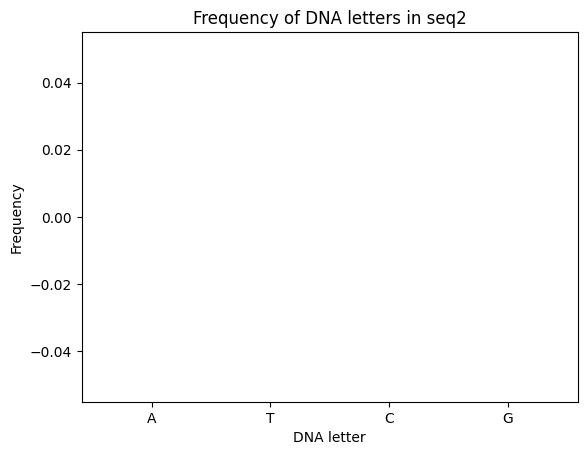

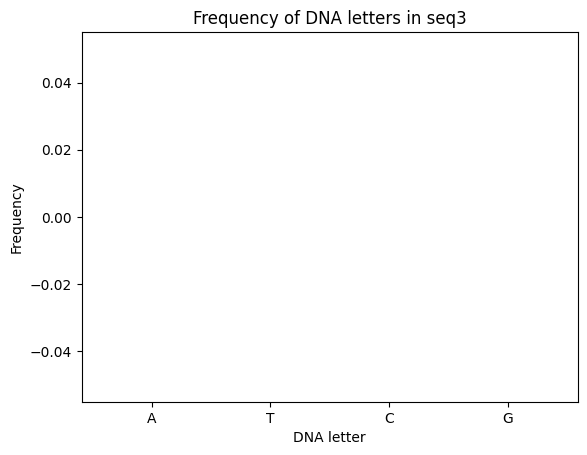

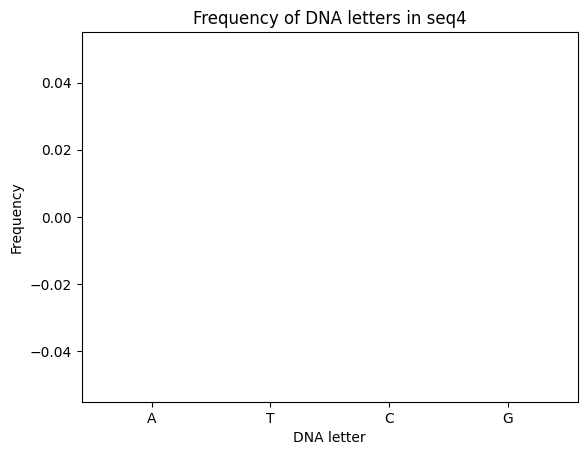

In [34]:
# 4. Putting it all together

# Step 1: Read the DNA file
file_path = 'dna_raw.txt'
sequences = read_dna_file(file_path)

# Step 2: Count the DNA sequences
dna_counts = count_dna_letters(sequences)

# Step 3: Plot the DNA counts into a bar chart
plot_dna_counts(dna_counts)

#### Trouble shooting to check why graph bars are not plotting
- ok, so the bars are not plotting, something is wrong/missing so below
    I will show my trouble shooting process

In [25]:
# Checking the working directory. Is the path correct?
import os
print(os.getcwd())

file_path = 'dna_raw.txt'

/Users/susannarokka/Desktop/Python/Lab1_Python_DNA


In [36]:
# Checking the existence of the file in the working directory through a boolean
import os
file_path = 'dna_raw.txt'
print(os.path.exists(file_path))

True


In [6]:
# Checking to see if the sequences from file are reading correctly.
# Here i can see that the sequences are indeed not reading correctly, and
# the case-sensitivity is not reading as expected. Fixing this further below ->

with open('dna_raw.txt', 'r') as file:
    lines = file.readlines()
    print(lines[:5]) #printing only the 5 first lines to check the data to see
                     # how the data is being read. So i can see from the 
                     # output below that the data is not cleaned.

['>seq1\n', 'cGTAaccaataaaaaaacaagcttaacctaattc\n', '>seq2\n', 'agcttagTTTGGatctggccgggg\n', '>seq3\n']


In [35]:
# Checking to see if the sequences are being counted properly. It seems
# all the values are zero?? So the counting function is not working properly.
# The parsing of the sequence is not formatted correctly, the issue seems to be
# the mix of lower and upper case of the letters in the sequences.

print(dna_counts)

{'seq1': {'A': 0, 'T': 0, 'C': 0, 'G': 0}, 'seq2': {'A': 0, 'T': 0, 'C': 0, 'G': 0}, 'seq3': {'A': 0, 'T': 0, 'C': 0, 'G': 0}, 'seq4': {'A': 0, 'T': 0, 'C': 0, 'G': 0}}


In [48]:
# Adjusting the formatting to plot the bars. Again.
def read_dna_file(file_path = 'dna_raw.txt'):
    with open(file_path, 'r') as file:
        lines = file.read().splitlines()

    sequences = {}
    sequence_id = None
    sequence = ''

    for line in lines:
        line = line.strip()

        if line.startswith('>'):
            if sequence_id:
                sequences[sequence_id] = sequence
            sequence_id = line[1:]
            sequence = ''
        else:
            sequence += line.lower() #lower case the letters here

    if sequence_id:
        sequences[sequence_id] = sequence

    return sequences
print(sequences)

{'seq1': 'cgtaaccaataaaaaaacaagcttaacctaattc', 'seq2': 'agcttagtttggatctggccgggg', 'seq3': 'gcggatttactccccccaaaaannaggggagagcccagataaatggagtctgtgcgtccaca', 'seq4': 'gcggatttactcaggggagagcccagggataaatggagtctgtgcgtccaca'}


#### ok so now the sequences are cleaned, parsed and can be accounted for and plotted

In [53]:
# Try again to count the sequences

def count_dna_letters(sequences):
    dna_counts = {}
    for sequence_id, sequence in sequences.items():
        # Initialize the counts: A, T, C, G
        counts = {'a' : 0, 't' : 0, 'c' : 0, 'g' : 0} # adjusted to count lower case letters
                                                      # previously, the count was for upper case letters.

        # For-loop to count occurrences of A, T, C, G
        for letter in sequence:
            if letter in counts:
                counts[letter] += 1

        dna_counts[sequence_id] = counts
    return dna_counts
print(dna_counts)
# still getting zero values for the counts.

{'seq1': {'A': 0, 'T': 0, 'C': 0, 'G': 0}, 'seq2': {'A': 0, 'T': 0, 'C': 0, 'G': 0}, 'seq3': {'A': 0, 'T': 0, 'C': 0, 'G': 0}, 'seq4': {'A': 0, 'T': 0, 'C': 0, 'G': 0}}


In [51]:
# Checking AGAIN to see the sequences from file are reading correctly

with open('dna_raw.txt', 'r') as file:
    lines = file.readlines()
    print(lines[:10])

['>seq1\n', 'cGTAaccaataaaaaaacaagcttaacctaattc\n', '>seq2\n', 'agcttagTTTGGatctggccgggg\n', '>seq3\n', 'gcggatttactcCCCCCAAAAANNaggggagagcccagataaatggagtctgtgcgtccaca\n', '>seq4\n', 'gcggatttactcaggggagagcccagGGataaatggagtctgtgcgtccaca']


In [54]:
import matplotlib.pyplot as plt

def plot_dna_counts(dna_counts):
    for sequence_id, counts in dna_counts.items():
        letters = [letter.upper() for letter in counts.keys()]
        frequencies = list(counts.values())

        plt.figure()
        plt.bar(letters, frequencies, color = ['red', 'green', 'blue', 'yellow'])
        plt.title(f"Frequency of DNA letters in {sequence_id}")
        plt.xlabel('DNA letters')
        plt.ylabel('Frequency')
        plt.show()

**finally figured out that upper case and lower case string parsing was the issue - this is why the code was not running properly, and the graph bars were not plotting because there were no values to plot from**


{'seq1': {'a': 17, 't': 7, 'c': 8, 'g': 2}, 'seq2': {'a': 3, 't': 7, 'c': 4, 'g': 10}, 'seq3': {'a': 18, 't': 10, 'c': 16, 'g': 16}, 'seq4': {'a': 13, 't': 10, 'c': 11, 'g': 18}}


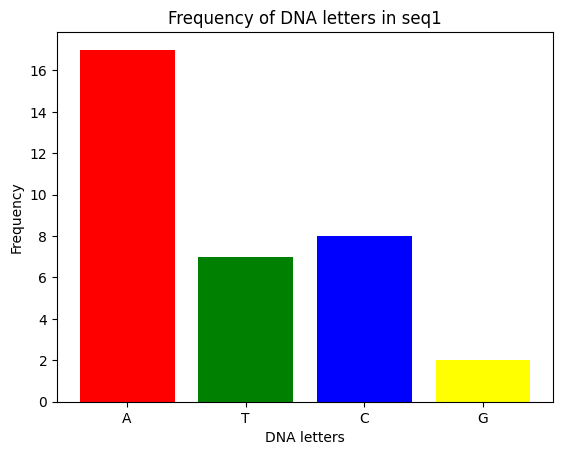

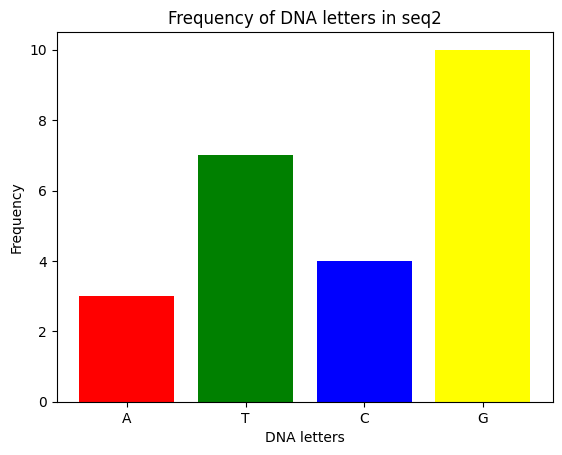

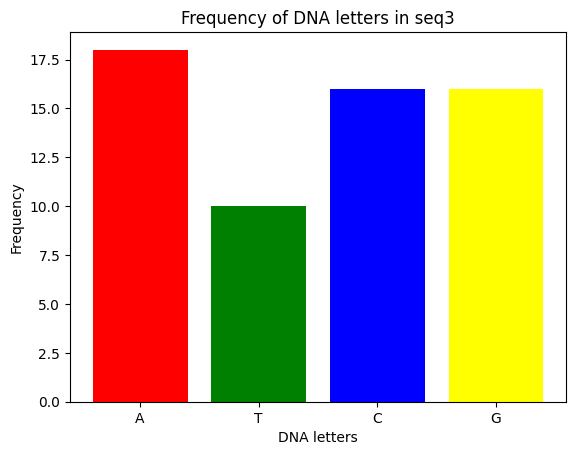

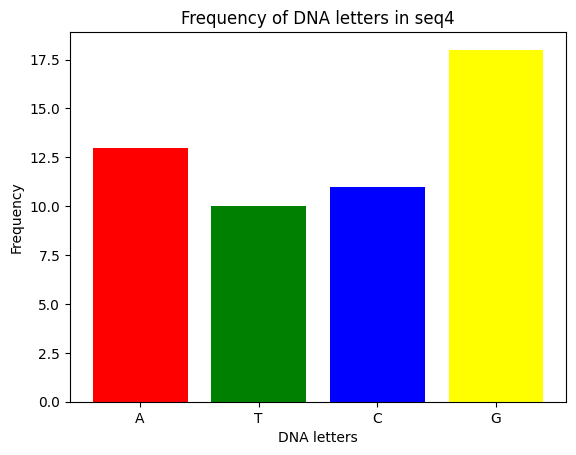

In [55]:
file_path = 'dna_raw.txt'
sequences = read_dna_file(file_path)

dna_counts = count_dna_letters(sequences)
print(dna_counts)

plot_dna_counts(dna_counts)


**Next task to build on the above, is to create a function that:
- Takes in new data files (similar to dna_raw.txt)
- Parses and plots data of variable sequence and frequency from above
- Can i re-use the above code or does it need to be adjusted? if so, how?

In [16]:
#Function to parse DNA data
# 1. Parse any sequence of DNA data using the function below

def parse_dna_data(data):
    lines = data.splitlines()
    sequences = {}
    sequence_id = None
    sequence = ''

    for line in lines:
        line = line.strip()

        if line.startswith('>'):
            if sequence_id:
                sequences[sequence_id] = sequence.lower()
            sequence_id = line[1:]
            sequence = ''
        else:
            sequence += line
            if sequence_id:
                sequences[sequence_id] = sequence.lower()
    return sequences

# define the plotting function
import matplotlib.pyplot as plt

def plot_dna_counts(dna_counts):
    for sequence_id, counts in dna_counts.items():
        letters = [letter.upper() for letter in counts.keys()]
        frequencies = list(counts.values())

        plt.figure()
        plt.bar(letters, frequencies, color = ['red', 'green', 'blue', 'yellow'])
        plt.title(f"Frequency of DNA letters in {sequence_id}")
        plt.xlabel('DNA letters')
        plt.ylabel('Frequency')
        plt.show()


# 2. Count the data (either from file or in string format) using the 
# counting function from above: ("def count_dna_letters(sequences)"")
# 3. Plot the data using by calling the function parse_dna_data(your_string_here)
# and plot it in matplotlib

In [17]:
# bring it all together and call for the functions
file_path = 'dna_raw.txt'
sequences = parse_dna_data(file_path) #read_dna_file(file_path)

dna_counts = count_dna_letters(sequences)
print(dna_counts)

plot_dna_counts(dna_counts)

{}


#### Task (VG): parse, count and plot 'complicated' DNA-sequence in file marked 'dna_raw_complicated.txt'

In [59]:
# 1. Parse the DNA data
def read_dna_file(file_path = 'dna_raw_complicated.txt'):
    with open(file_path, 'r') as file:
        lines = file.read().splitlines()

    sequences = {}
    sequence_id = None
    sequence = ''

    for line in lines:
        line = line.strip()

        if line.startswith('>'):
            if sequence_id:
                sequences[sequence_id] = sequence
            sequence_id = line[1:]
            sequence = ''
        else:
            sequence += line.lower() #make all letters lower case here

    if sequence_id:
        sequences[sequence_id] = sequence

    return sequences
print(sequences) # print to check output - it looks correct


{'seq1': 'cgtaaccaataaaaaaacaagcttaacctaattc', 'seq2': 'agcttagtttggatctggccgggg', 'seq3': 'gcggatttactccccccaaaaannaggggagagcccagataaatggagtctgtgcgtccaca', 'seq4': 'gcggatttactcaggggagagcccagggataaatggagtctgtgcgtccaca'}


In [63]:
# 2. Count the DNA sequences
def count_dna_letters(sequences):
    dna_counts = {}
    for sequence_id, sequence in sequences.items():
        # Initialize the counts: A, T, C, G, N
        counts = {'a' : 0, 't' : 0, 'c' : 0, 'g' : 0, 'n' : 0} # adjusted to count lower case letters. now including N

        # For-loop to count occurrences of A, T, C, G, N
        for letter in sequence.lower():
            if letter in counts:
                counts[letter] += 1

        dna_counts[sequence_id] = counts
    return dna_counts
print(dna_counts) # print to check output so far - 'N' is missing


{'seq1': {'a': 17, 't': 7, 'c': 8, 'g': 2}, 'seq2': {'a': 3, 't': 7, 'c': 4, 'g': 10}, 'seq3': {'a': 18, 't': 10, 'c': 16, 'g': 16}, 'seq4': {'a': 13, 't': 10, 'c': 11, 'g': 18}}


In [65]:
# double-checking to see that also 'N' is being counted. yes!
dna_counts = count_dna_letters(sequences)
print(dna_counts)

{'seq1': {'a': 17, 't': 7, 'c': 8, 'g': 2, 'n': 0}, 'seq2': {'a': 3, 't': 7, 'c': 4, 'g': 10, 'n': 0}, 'seq3': {'a': 18, 't': 10, 'c': 16, 'g': 16, 'n': 2}, 'seq4': {'a': 13, 't': 10, 'c': 11, 'g': 18, 'n': 0}}


In [68]:
# 3. plot the counts into a bar chart

import matplotlib.pyplot as plt

def plot_dna_counts(dna_counts):
    for sequence_id, counts in dna_counts.items():
        letters = [letter.upper() for letter in counts.keys()]
        frequencies = list(counts.values())

        plt.figure()
        plt.bar(letters, frequencies, color = ['red', 'green', 'blue', 'yellow', 'orange'])
        plt.title(f"Frequency of DNA letters in {sequence_id}")
        plt.xlabel('DNA letters')
        plt.ylabel('Frequency')
        plt.yticks(range(0, max(frequencies) + 1, 1)) #adjusted to show increments of 1
        plt.show()

{'seq1': {'a': 17, 't': 7, 'c': 8, 'g': 2, 'n': 0}, 'seq2': {'a': 3, 't': 7, 'c': 4, 'g': 10, 'n': 0}, 'seq3': {'a': 36, 't': 19, 'c': 34, 'g': 21, 'n': 2}, 'seq4': {'a': 17, 't': 12, 'c': 15, 'g': 20, 'n': 0}}


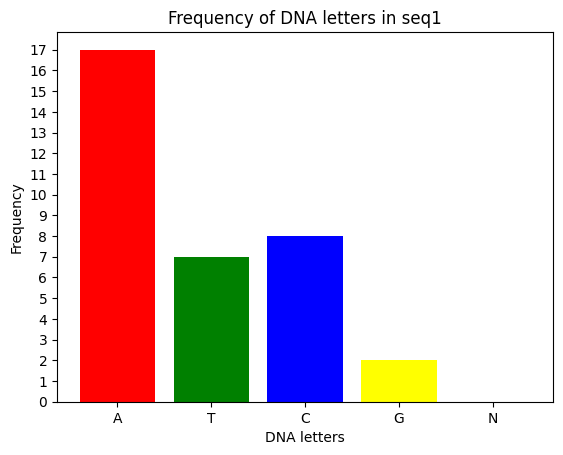

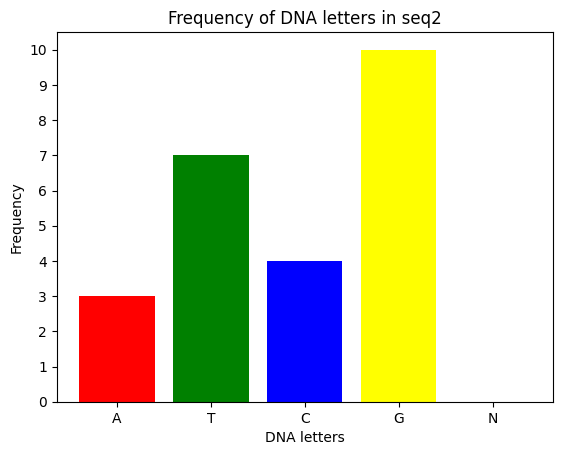

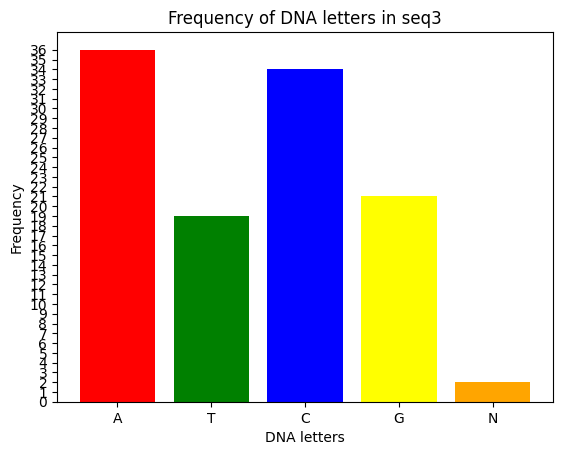

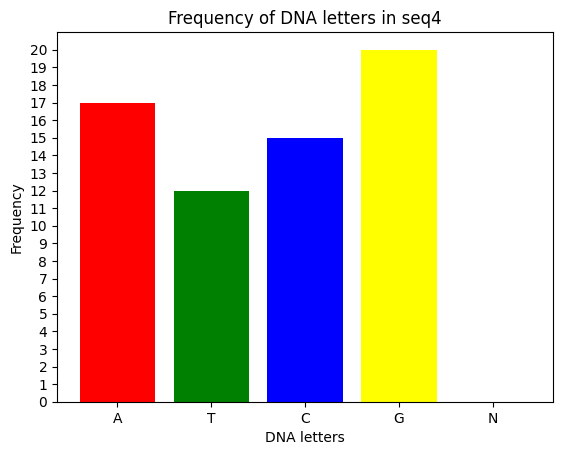

In [69]:
# 4. Call all the functions, parse, count and plot

file_path = 'dna_raw_complicated.txt'
sequences = read_dna_file(file_path)

dna_counts = count_dna_letters(sequences)
print(dna_counts)

plot_dna_counts(dna_counts)

In [70]:
# issue: manually checking the data, it seems that the data is not being read correctly
# counts are not correct.
# seq 4. 'g' counts at 18, but bar chart shows 20

print("Sequence for seq4:", sequences['seq4'])
print("Counts for seq4:", dna_counts['seq4'])

# found the issue in higher/lower case parsing. It was correct all along.

Sequence for seq4: gcggatttactcaggggagagcccagggataaatggagtctgtgcgtccacagaattcgcacca
Counts for seq4: {'a': 17, 't': 12, 'c': 15, 'g': 20, 'n': 0}
